In [1]:
import control
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing()

## Original System

In [2]:
s = control.tf([1, 0], [0, 1])

In [3]:
G = 1/((s+2)*s)
G


    1
---------
s^2 + 2 s

### Requirements

* 0 steady state error to unit ramp response
* damping ratio of sqrt(2)/2
* settling time of 2 seconds

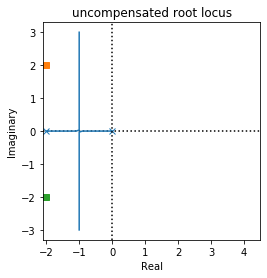

In [4]:
control.rlocus(G, np.linspace(0, 10, 1000));
plt.title('uncompensated root locus')
sd = -2 + 2j

plt.plot(np.real(sd), np.imag(sd), 's')
plt.plot(np.real(sd), -np.imag(sd), 's')
plt.axis('square')

1 states have been removed from the model


Text(0.5, 1.0, 'uncompensated unit ramp response error')

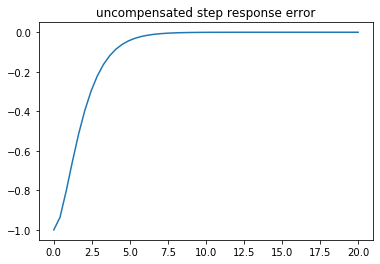

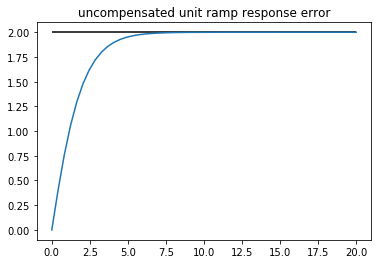

In [5]:
Gc = G/(1+G)
t, y = control.step_response(Gc, T=np.linspace(0, 20));
plt.plot(t, y - 1, label='y')
#plt.hlines(1, 0, 20, label='u')
plt.title('uncompensated step response error')

Kv = np.real((control.minreal(s*G).horner(0))[0, 0])
Kv

plt.figure()
t, y = control.step_response(Gc/s, T=np.linspace(0, 20));
plt.plot(t, t-y, label='e')
plt.hlines(1/Kv, 0, 20)
plt.title('uncompensated unit ramp response error')

## PID Compensator


* Do PD first

In [6]:
H_PD = 2*(s + 4)


Text(0.5, 1.0, 'lead compensated root locus')

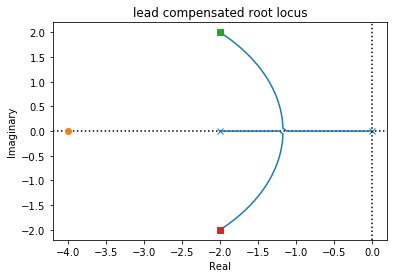

In [7]:
control.rlocus(
    G*H_PD, np.linspace(0, 1, 1000));
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')
plt.title('lead compensated root locus')

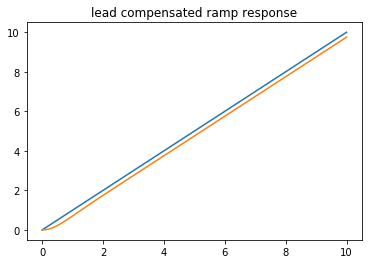

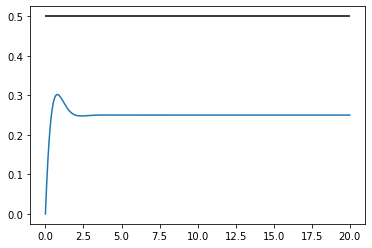

In [8]:
Gc_PD = G*H_PD/(1+G*H_PD)
t, y = control.step_response(Gc_PD/s, T=np.linspace(0, 10, 1000));
plt.plot(t, t)
plt.plot(t, y)
plt.title('lead compensated ramp response')

plt.figure()
t, y = control.step_response(Gc_PD/s, T=np.linspace(0, 20, 1000));
plt.plot(t, t-y)
plt.hlines(0.5, 0, 20)

## PI Compensator

In [9]:
z = 0.01
H_PI = (s+z)/s

In [10]:
H = H_PD*H_PI

In [11]:
H


2 s^2 + 8.02 s + 0.08
---------------------
          s

Find: 

K_P = 8.02, K_I = 0.08, K_D = 2

In [12]:
1/np.abs((G*H).horner(-2 + 2j))

array([[1.00250312]])

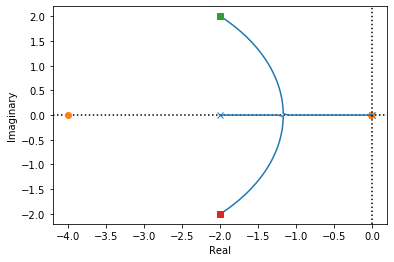

In [13]:
control.rlocus(G*H, np.linspace(0, 1, 1000));
plt.plot(-2, 2, 's')
plt.plot(-2, -2, 's')

In [14]:
control.minreal(G*H_PD*s).horner(0)

1 states have been removed from the model


array([[4.+0.j]])

In [15]:
control.minreal(G*H*s).horner(0)

1 states have been removed from the model


/home/jgoppert/anaconda3/envs/aae364/lib/python3.7/site-packages/control/xferfcn.py:610: RuntimeWarning: divide by zero encountered in double_scalars
  polyval(self.den[i][j], s))


array([[inf+0.j]])

Text(0.5, 1.0, 'lead-lag compensated ramp response error')

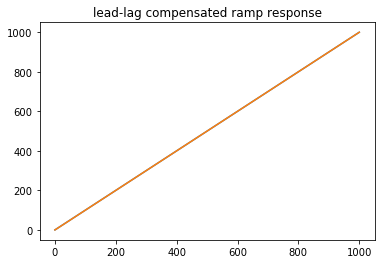

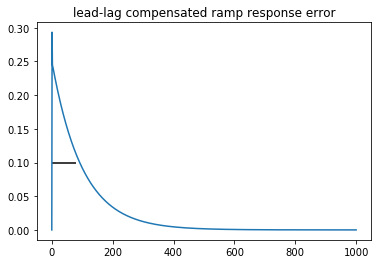

In [16]:
Gc_PID = G*H/(1+G*H)
t, y = control.step_response(Gc_PID/s, T=np.linspace(0, 1000, 1000));
plt.plot(t, t)
plt.plot(t, y)
plt.title('lead-lag compensated ramp response')

plt.figure()
plt.plot(t, t - y)
plt.hlines(0.1, 0, 80)
plt.title('lead-lag compensated ramp response error')

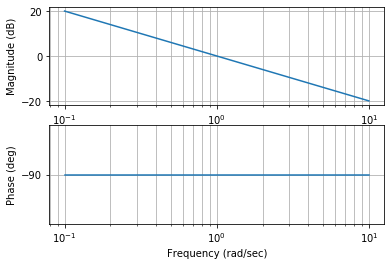

In [17]:
control.bode(1/s, dB=True);

A pole:
    
* -20 dB/dec
* -90 deg

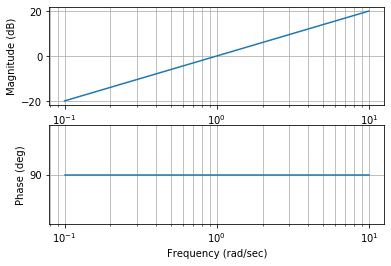

In [18]:
control.bode(s, dB=True);

# zero

+ 20 dB/dec
* 90 deg

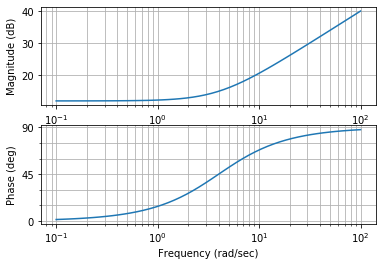

In [19]:
control.bode(s + 4, dB=True);

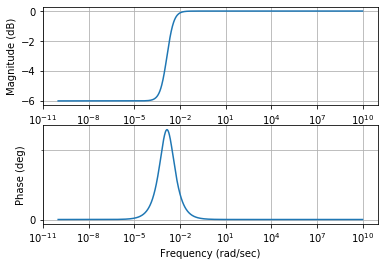

In [20]:
mag, phase, omega = control.bode((s+0.001)/(s + 0.002), dB=True, deg=True, omega=np.logspace(-10, 10, 1000))

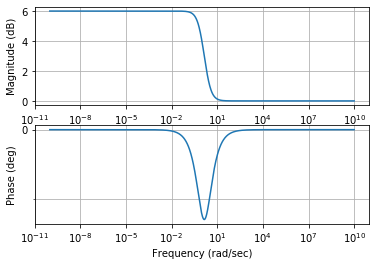

In [21]:
mag, phase, omega = control.bode((s+2)/(s + 1), dB=True, deg=True, omega=np.logspace(-10, 10, 1000))

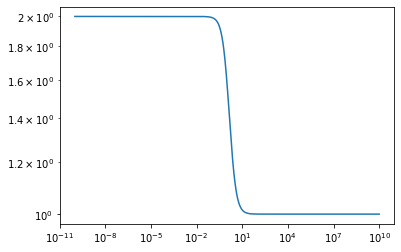

In [22]:
plt.loglog(omega, mag)

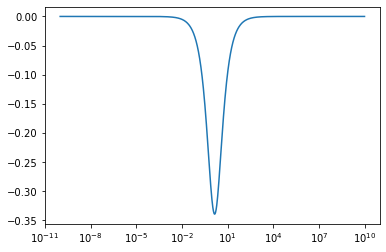

In [23]:
plt.semilogx(omega, phase)

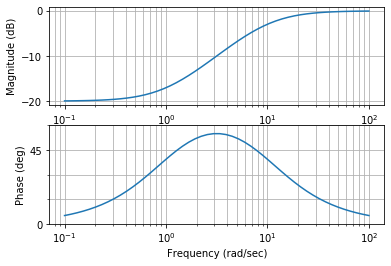

In [24]:
control.bode((s+1)/(s+10), dB=True);